In [79]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
from StringIO import StringIO
import seaborn as sns
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations

dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

**Analysis Based on 2014 Harvard CS109 Lecture:** http://cs109.github.io/2014/pages/lectures/lecture13-matrix-algebra.html#/22  

### Research Data
**Allelic Differences Account for Gene Expression Differences Among Population** - GEO (Gene Expression Omnibus):   http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE5859 

- Researchers were trying to find out if there were differences in gene expression of certain genes according to ethnicity.
- Researchers claimed 70% of genes were differentially expressed across different ethnicity.

**Information**

- Gene expression is the process by which information from a gene is used in the synthesis of a functional gene products (proteins/RNA). 

- A DNA microarray (also commonly known as DNA chip or biochip) is a collection of microscopic DNA spots attached to a solid surface. Scientists use DNA microarrays to measure the expression levels of large numbers of genes simultaneously or to genotype multiple regions of a genome.  

- *Genes are subunits of DNA*, the information database of a cell that is contained inside the cell nucleus. This DNA carries the genetic blueprint that is used to make all the proteins the cell needs. *Every gene contains a particular set of instructions that code for a specific protein*. DNA exists in the form of two long, paired strands that form a double helix. Each of these strands is made up of individual building blocks called nucleotide bases. These bases include adenine, thymine, cytosine, and guanine (A, T, C and G), which are arranged in triplets, with each triplet representing a specific amino acid.

- Why humans are different than plants? - Cells have DNA, and DNA of 2 humans are very similar but very different than DNA of plants. 

Two data sets used:  

1. **Gene Expression intensities:** where the rows represent the genes and the columsns represent the different microarray samples.  

2. **Information about each of the samples:** sex, age, treatment status, date the samples were processed

Read data

In [39]:
url_exprs = 'https://raw.githubusercontent.com/cs109/2014_data/master/exprs_GSE5859.csv'
url_sampleinfo = 'https://raw.githubusercontent.com/cs109/2014_data/master/sampleinfo_GSE5859.csv'

In [40]:
exprs = pd.read_csv(url_exprs, index_col = 0) # Making 1st column as index
sampleinfo = pd.read_csv(url_sampleinfo)

In [42]:
exprs.head(2)

,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,GSM25399.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
1007_s_at,6.333951,5.736190,6.156754,6.513010,6.061013,6.506493,6.863426,6.369645,6.646321,5.810930,...,7.082636,6.315866,7.010165,6.460107,6.122355,6.330314,6.627014,6.133068,6.419444,6.488579
1053_at,7.255622,7.399993,7.491967,7.006123,7.250995,7.082581,6.842236,7.048487,7.042361,6.666625,...,6.599718,7.412731,7.274429,6.928642,7.168782,7.235648,6.939184,7.280781,6.351776,7.517410


In [43]:
sampleinfo.head(2)

,ethnicity,date,filename,sex
0,CEU,2003-02-04,GSM25349.CEL.gz,M
1,CEU,2003-02-04,GSM25350.CEL.gz,M


Check if the order of column in gene expression DF matches the order of file names in sample annotation DF

In [44]:
# Print column index from exprs 
print len(exprs.columns)
# Print filename from sampleinfo
print len(sampleinfo['filename'])
# Print if order of columns matches the order of rows
check = (exprs.columns == sampleinfo['filename']).all()
print check

208
208
False


In [45]:
# Columns and rows are out of order, testing which colums are in order
sampleinfo[exprs.columns == sampleinfo['filename']]

,ethnicity,date,filename,sex
23,CEU,2002-11-21,GSM25482.CEL.gz,F


In [46]:
## Reordering columns (Kind of confusing)
a = list(exprs.columns)
b = list(sampleinfo['filename'])
# Get matching index by iterating through each element in b and return the index that matches
match_index = [a.index(i) for i in b]
exprs = exprs[match_index] # Reordering columns
# Print if order of columns matches the order of rows
check = (exprs.columns == sampleinfo['filename']).all()
print check

True


In [47]:
exprs.head(2)

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM136719.CEL.gz,GSM136720.CEL.gz,GSM136721.CEL.gz,GSM136722.CEL.gz,GSM136723.CEL.gz,GSM136724.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz,GSM136729.CEL.gz
1007_s_at,6.627014,6.249807,5.934128,6.145268,6.091270,6.041186,6.050375,6.063847,6.226106,6.358282,...,6.466445,6.533592,6.631492,6.513362,6.440706,6.704324,6.488579,6.809481,6.133068,6.155473
1053_at,6.939184,6.818038,7.047962,7.422477,7.272361,7.128216,6.750719,6.836287,6.738022,7.367895,...,7.032885,7.156344,7.018025,6.973322,6.884738,7.120898,7.517410,7.200596,7.280781,7.111583


In [48]:
sampleinfo.head(2)

,ethnicity,date,filename,sex
0,CEU,2003-02-04,GSM25349.CEL.gz,M
1,CEU,2003-02-04,GSM25350.CEL.gz,M


In [56]:
print exprs.shape
print sampleinfo.shape
print 'Number of genes: %d' % exprs.shape[0]
print 'Number of samples: %d' % exprs.shape[1]

(8793, 208)
(208, 7)
Number of genes: 8793
Number of samples: 208


In [50]:
sampleinfo['date'] = pd.to_datetime(sampleinfo['date'])
# Extracting year, month, day
print sampleinfo['date'][0].year 
print sampleinfo['date'][0].month
print sampleinfo['date'][0].day

2003
2
4


In [52]:
# map(function, sequence[, sequence, ...]) -> list
sampleinfo['month'] = map(lambda x: x.month, sampleinfo['date'])
sampleinfo['day'] = map(lambda x: x.day, sampleinfo['date'])
sampleinfo['year'] = map(lambda x: x.year, sampleinfo['date'])
sampleinfo.head(2)

,ethnicity,date,filename,sex,month,day,year
0,CEU,2003-02-04,GSM25349.CEL.gz,M,2,4,2003
1,CEU,2003-02-04,GSM25350.CEL.gz,M,2,4,2003


**Gene Expression Intensity** 

Matrix Cell $(i, j)$ = How much message of Gene $i$ is in sample $j$ 

Normalize Gene Expression Data: Subtract the average gene expression intensity from each of the samples. 

In [53]:
data = exprs.apply(lambda x: x - exprs.mean(axis=1), axis = 0)
data.head(2)

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM136719.CEL.gz,GSM136720.CEL.gz,GSM136721.CEL.gz,GSM136722.CEL.gz,GSM136723.CEL.gz,GSM136724.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz,GSM136729.CEL.gz
1007_s_at,0.243751,-0.133457,-0.449135,-0.237995,-0.291993,-0.342077,-0.332888,-0.319417,-0.157157,-0.024981,...,0.083182,0.150329,0.248229,0.130099,0.057442,0.321061,0.105316,0.426218,-0.250195,-0.227791
1053_at,-0.152446,-0.273592,-0.043668,0.330846,0.180731,0.036586,-0.340911,-0.255344,-0.353609,0.276264,...,-0.058746,0.064714,-0.073605,-0.118309,-0.206893,0.029268,0.425779,0.108966,0.189150,0.019952


Singular Value Decomposition (SVD)
===
- Method for transforming correlated variables into a set of uncorrelated variables that better explain the various relationships among the original data
- Method for identifying and ordering the dimensions along which data points exihibit the most variation
- Dimensionality reduction - Best approximation of the original data using fewer dimensions

Theorem: A rectangular matrix A can be broken down into the product of three matrices - an orthogonal matrix U, a diagonal matrix D, and transpose of an orthogonal matrix V. (Orthogonal - 0 correlation between columns or columns are independent of each other)

We have a data matrix with $N$ observations (rows) and $p$ columns. 

We can write our data matrix as

$$X = U D V^\top , \mbox{ with } $$
* $U$ is $N\times p$ with  $U^\top U=I$
* $V$ is $p\times p$ with $V^\top V=I$ and
* $D$ is $p \times p$ diagonal matrix - *Entries of $D$ explain variability*

We are changing basis: $XV = UD$ 

And can change back $XVV^\top = X$

In [68]:
X = data.T
print X.shape

(208, 8793)


In [69]:
#Singular Value Decomposition
#U are the left singular vectors
#d are the singular values
#U*d gives PCA scores
#V are the right singular vectors -- PCA loadings
U, d, Vh = np.linalg.svd(X)

In [70]:
print U.shape, d.shape, Vh.shape

(208, 208) (208,) (8793, 8793)


In [82]:
#d^2 is proportional to the variance explained by the dimension
#For variance explained, normalize d^2

var_exp = d**2/sum(d**2)

print "The first component explains %0.2f%% of the variance."%(var_exp[0]*100)
print "The second component explains %0.2f%% of the variance."%(var_exp[1]*100)

The first component explains 21.85% of the variance.
The second component explains 9.92% of the variance.


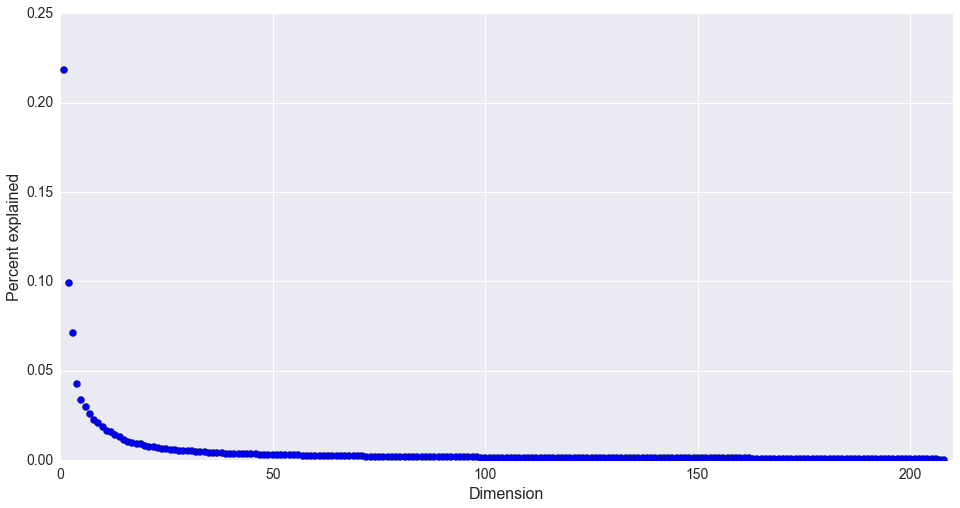

In [112]:
plt.figure(figsize = (16, 8))
plt.scatter(range(1,len(d)+1), d**2/np.sum(d**2), s = 50)
plt.xlabel("Dimension", fontsize = 16)
plt.ylabel("Percent explained", fontsize = 16)
plt.xlim(0, 210)
plt.ylim(0,0.25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.show()

Ethnicity: Categorical to integer

In [101]:
temp = pd.Categorical.from_array(sampleinfo['ethnicity'])
sampleinfo['ethnicity_code'] = temp.labels
sampleinfo.head(2)

,ethnicity,date,filename,sex,month,day,year,ethnicity_code
0,CEU,2003-02-04,GSM25349.CEL.gz,M,2,4,2003,1
1,CEU,2003-02-04,GSM25350.CEL.gz,M,2,4,2003,1


<function matplotlib.pyplot.legend>

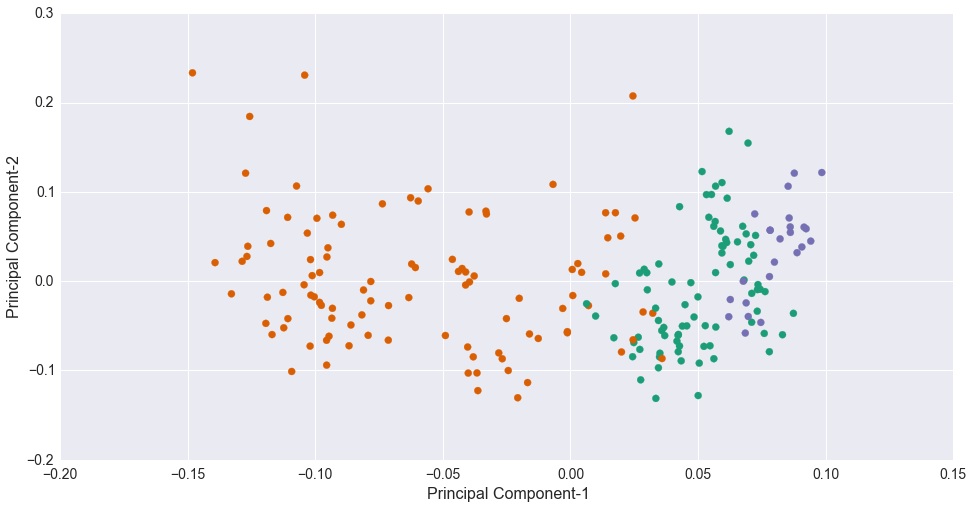

In [115]:
plt.figure(figsize = (16, 8))
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.xlabel("Principal Component-1", fontsize = 16)
plt.ylabel("Principal Component-2", fontsize = 16)
colors = [dark2_colors[i] for i in sampleinfo['ethnicity_code']]
plt.scatter(U[:,0], U[:,1], color = colors, s = 50)

Sex: Categorical to integer

In [107]:
temp = pd.Categorical.from_array(sampleinfo['sex'])
sampleinfo['sex_code'] = temp.labels
sampleinfo.head(2)

,ethnicity,date,filename,sex,month,day,year,ethnicity_code,sex_code
0,CEU,2003-02-04,GSM25349.CEL.gz,M,2,4,2003,1,1
1,CEU,2003-02-04,GSM25350.CEL.gz,M,2,4,2003,1,1


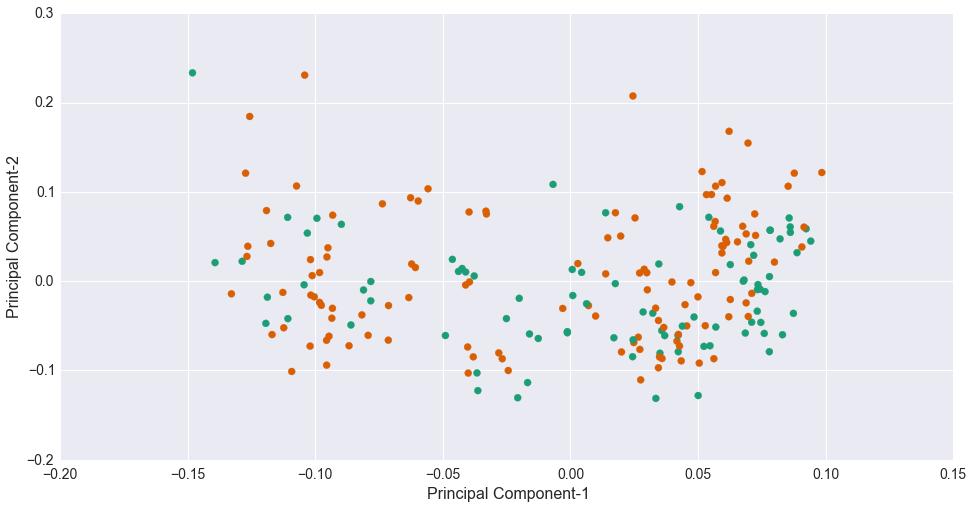

In [117]:
plt.figure(figsize = (16, 8))
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.xlabel("Principal Component-1", fontsize = 16)
plt.ylabel("Principal Component-2", fontsize = 16)
colors = [dark2_colors[i] for i in sampleinfo['sex_code']]
plt.scatter(U[:,0], U[:,1], color = colors, s = 50)